# Logistic Regression Practice

![wine image from http://canadianclubofrome.blogspot.com/2017/02/ccr-wine-tasting-wines-from-le-marche.html](images/wine.jpg)

Data Source: https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009/data

This wine data was gathered in 2009 from red and white variants of the Portuguese "Vinho Verde" wine.

In [1]:
# The most basic of imports
import pandas as pd
import numpy as np
np.random.seed(0)

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/winequality-red-withtarget.csv')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  target                1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,0.135710
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.342587
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,0.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,0.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,1.000000


## Business Understanding

We have a binary `target` column - each row is `1` if the wine is of great quality, and `0` if the wine is of normal/below average quality. "Great quality" is defined as having a 7+ wine quality score in the original data, from a column that has been removed in this csv.

So: what kind of problem is this?

- classification


Let's define a plausible business problem that this data could solve:

- pricing

Endusers:
- people buying the wine

True Business problem:
- create a model that can, if given data from wine producers about the composition of the wine, predict whether the wine will be of great (above average) quality

- False negative: predict that an actually good quality wine is bad
    - outcome: buy less wine
- False positive: predict that an actually bad quality wine is good 
    - outcome: buy bad wine --> minimize FP, optimize precision

- Related: which metric (of the ones we've explore so far) would make sense to primarily use as we evaluate our models? 

- Accuracy
- Precision
- Recall
- F1-Score


## Data Exploration and Cleaning

What steps do we want to perform to explore our data, and do we need to do any cleaning of this data to avoid problems down the line?

- scale data
- correlation, check for multicollinearity
- balance of target


In [8]:
df['target'].value_counts()

0    1382
1     217
Name: target, dtype: int64

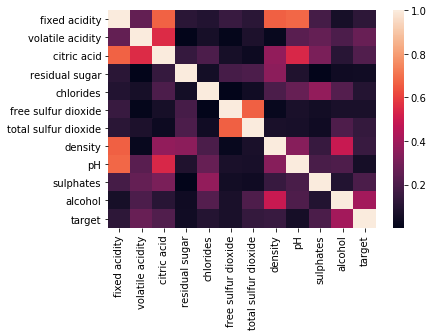

In [11]:
sns.heatmap(df.corr().abs())

In [14]:
df.corr().abs()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
fixed acidity,1.000000,0.256131,0.671703,0.114777,0.093705,0.153794,0.113181,0.668047,0.682978,0.183006,0.061668,0.120061
volatile acidity,0.256131,1.000000,0.552496,0.001918,0.061298,0.010504,0.076470,0.022026,0.234937,0.260987,0.202288,0.270712
citric acid,0.671703,0.552496,1.000000,0.143577,0.203823,0.060978,0.035533,0.364947,0.541904,0.312770,0.109903,0.214716
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,0.085652,0.005527,0.042075,0.047779
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,0.265026,0.371260,0.221141,0.097308
free sulfur dioxide,0.153794,0.010504,0.060978,0.187049,0.005562,1.000000,0.667666,0.021946,0.070377,0.051658,0.069408,0.071747
total sulfur dioxide,0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,0.066495,0.042947,0.205654,0.139517
density,0.668047,0.022026,0.364947,0.355283,0.200632,0.021946,0.071269,1.000000,0.341699,0.148506,0.496180,0.150460
pH,0.682978,0.234937,0.541904,0.085652,0.265026,0.070377,0.066495,0.341699,1.000000,0.196648,0.205633,0.057283
sulphates,0.183006,0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,0.196648,1.000000,0.093595,0.199485


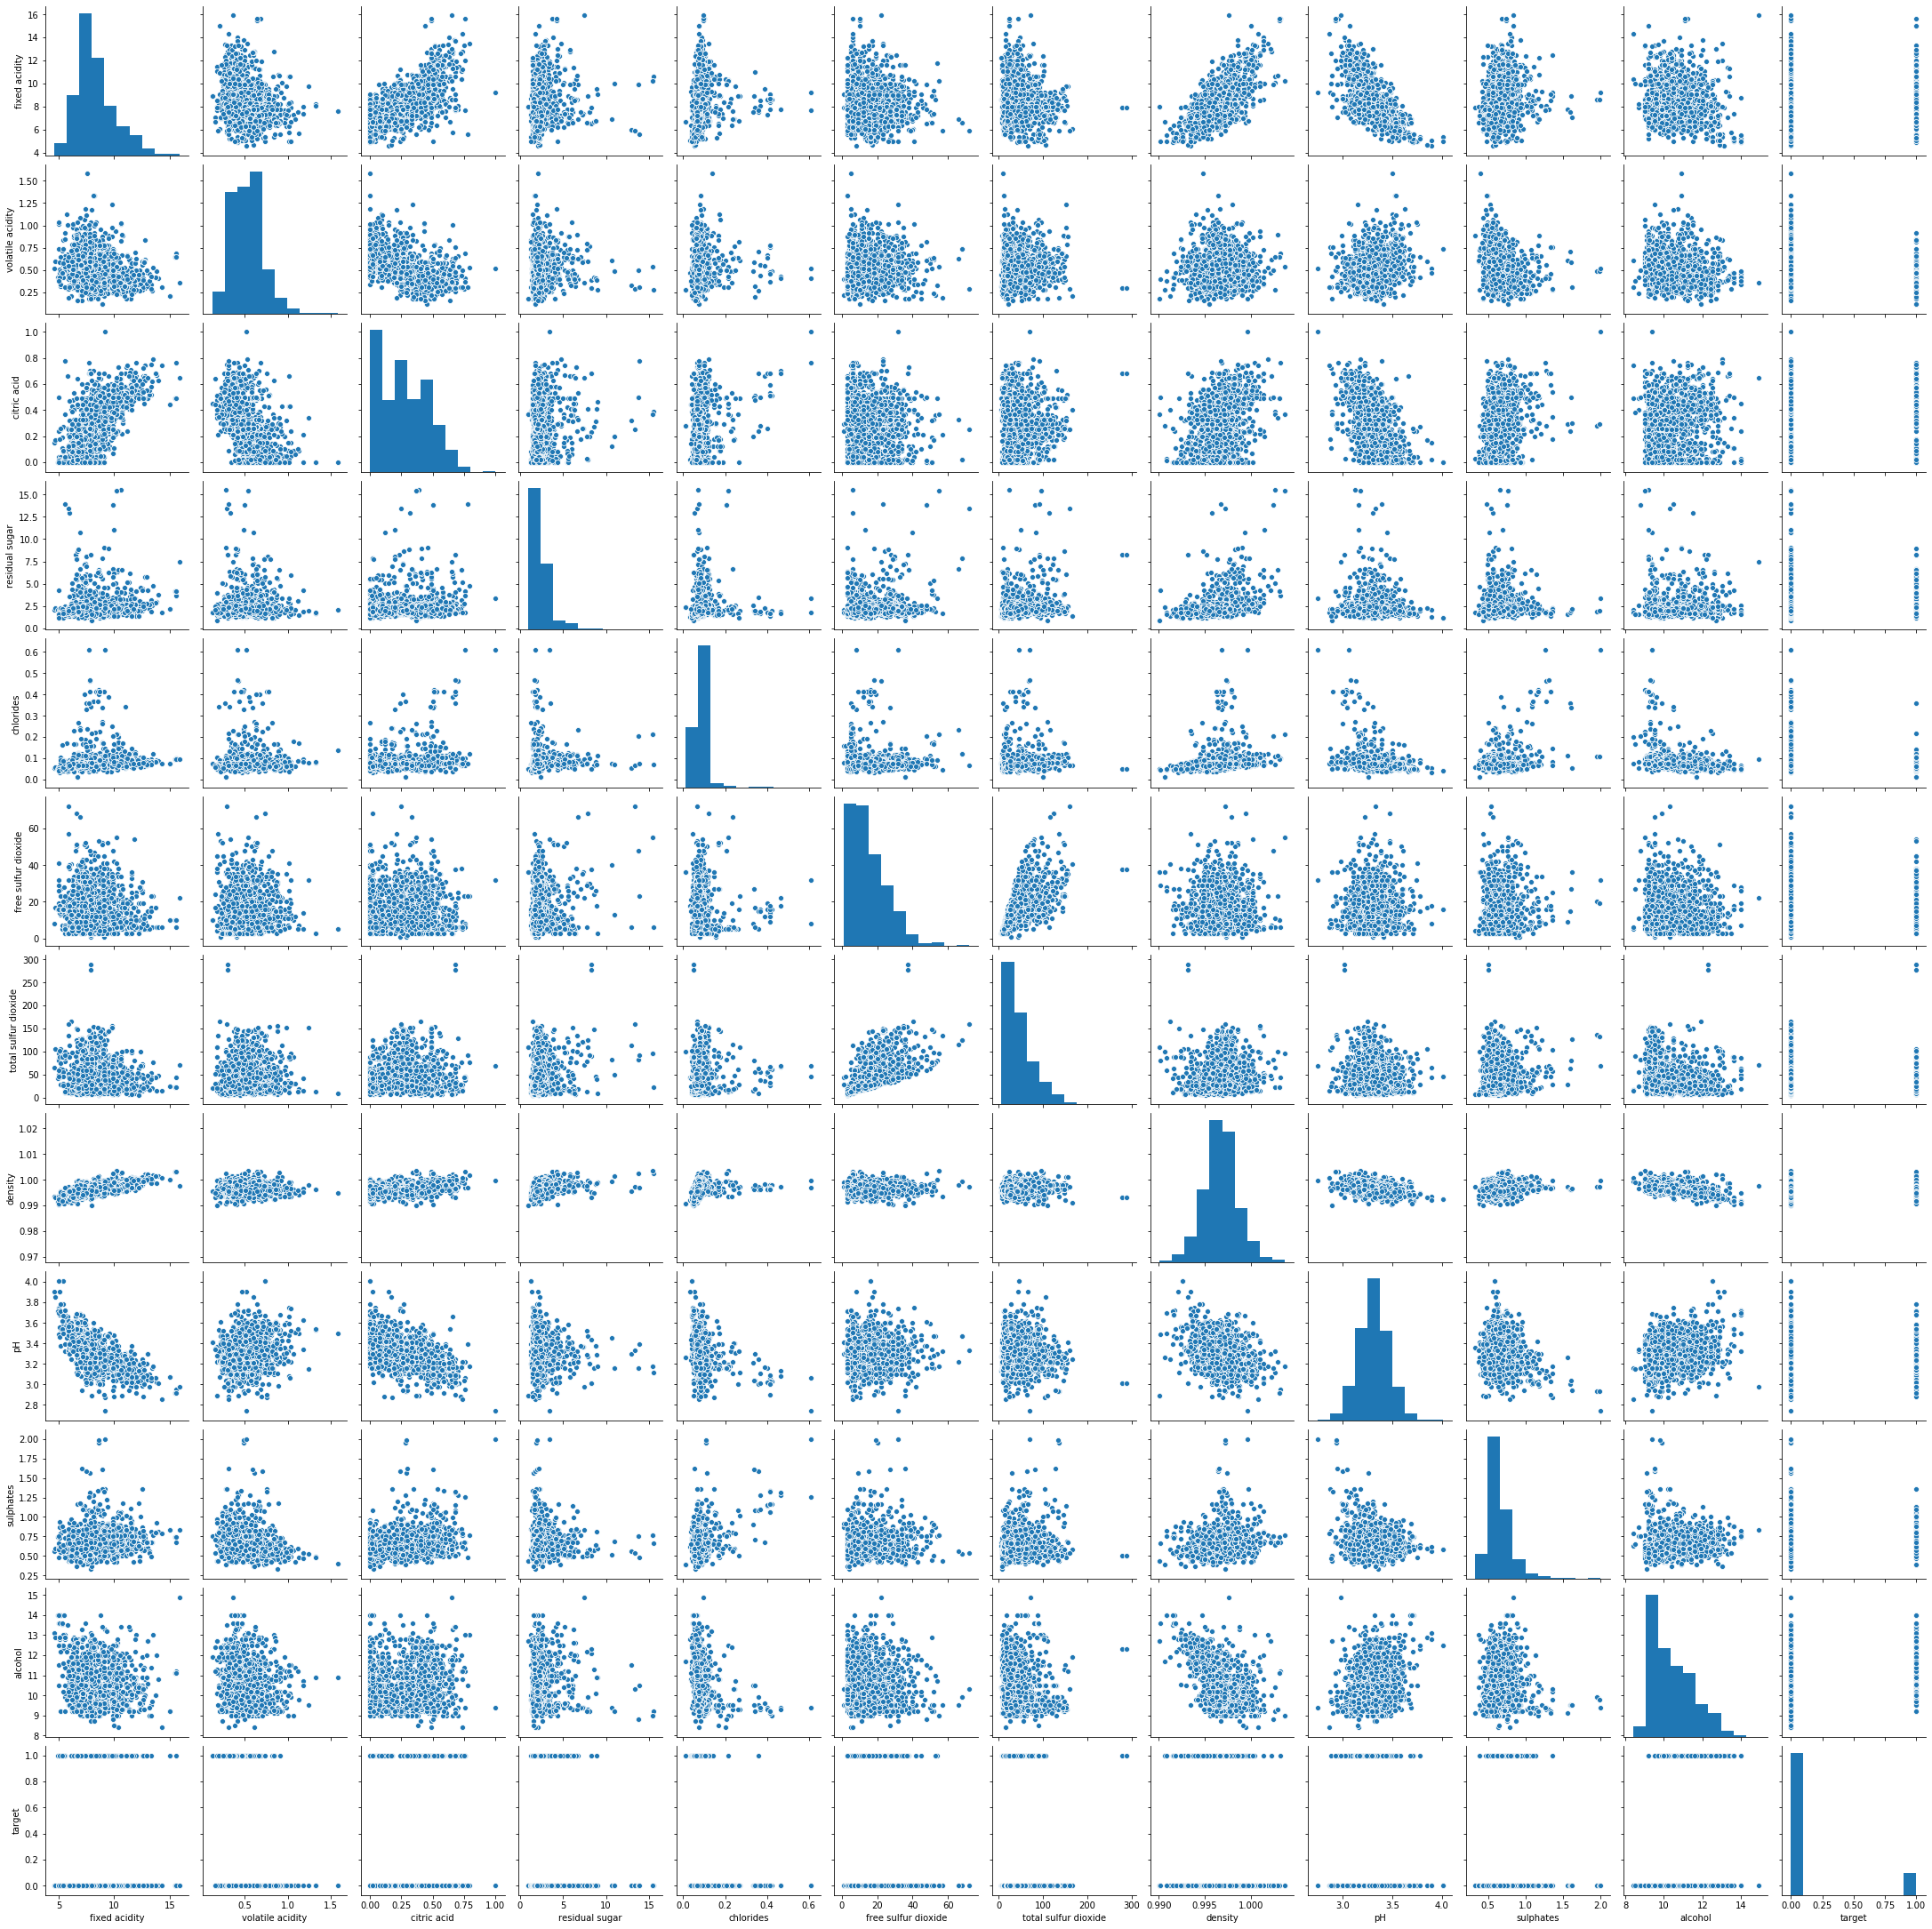

In [15]:
sns.pairplot(df)

## Modeling and Evaluation

Where do we want to start with modeling? What potential steps do we want to try to iterate through and potentially improve our model?

- define X and y and perform a train-set split
- scale - pre-processing before modeling
    - Standard vs MinMax vs Robust
- model
    - model-less baseline, LogReg
- balance our target
    - set 'class_weight = 'balanced'', also over-sample our minority class, under-sample our majority class, or sythethize more minority data with 'SMOTE'


In [17]:
X = df.drop(columns = 'target')
y = df['target']

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [22]:
scaler = StandardScaler()

In [23]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
len(df.loc[df['target'] == 0]) / len(df)  #model-less baseline

0.8642901813633521

### Vanilla logistic regression

In [39]:
logreg = LogisticRegression()

In [40]:
logreg.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

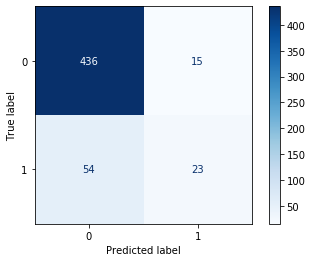

In [41]:
plot_confusion_matrix(logreg, X_test_scaled, y_test,
                      cmap=plt.cm.Blues, # Changing the color scheme
                      values_format=".3g")

In [42]:
y_pred_train = logreg.predict(X_train_scaled)
y_pred_test = logreg.predict(X_test_scaled)

In [43]:
metrics = {"Accuracy": accuracy_score,
           "Recall": recall_score,
           "Precision": precision_score,
           "F1-Score": f1_score}

for name, metric in metrics.items():
    print(f"{name}:"); print("="*len(name))
    print(f"TRAIN: {metric(y_train, y_pred_train):.4f}")
    print(f"TEST: {metric(y_test, y_pred_test):.4f}")
    print("*" * 15)

Accuracy:
TRAIN: 0.8880
TEST: 0.8693
***************
Recall:
TRAIN: 0.3071
TEST: 0.2987
***************
Precision:
TRAIN: 0.6515
TEST: 0.6053
***************
F1-Score:
TRAIN: 0.4175
TEST: 0.4000
***************


### Logistic regression: class_weight = 'balanced'

In [50]:
logreg_b = LogisticRegression(class_weight = 'balanced')

In [51]:
logreg_b.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

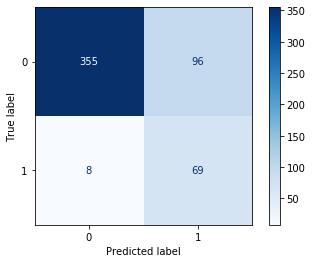

In [52]:
plot_confusion_matrix(logreg_b, X_test_scaled, y_test,
                      cmap=plt.cm.Blues, # Changing the color scheme
                      values_format=".3g")

In [53]:
y_pred_train = logreg_b.predict(X_train_scaled)
y_pred_test = logreg_b.predict(X_test_scaled)

In [54]:
metrics = {"Accuracy": accuracy_score,
           "Recall": recall_score,
           "Precision": precision_score,
           "F1-Score": f1_score}

for name, metric in metrics.items():
    print(f"{name}:"); print("="*len(name))
    print(f"TRAIN: {metric(y_train, y_pred_train):.4f}")
    print(f"TEST: {metric(y_test, y_pred_test):.4f}")
    print("*" * 15)

Accuracy:
TRAIN: 0.7824
TEST: 0.8030
***************
Recall:
TRAIN: 0.8071
TEST: 0.8961
***************
Precision:
TRAIN: 0.3542
TEST: 0.4182
***************
F1-Score:
TRAIN: 0.4924
TEST: 0.5702
***************


## Conclusion

How good was our final model? What can we learn from our model? What insights can we glean? 

- 
